In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pylab import rcParams
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [6]:
X , y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

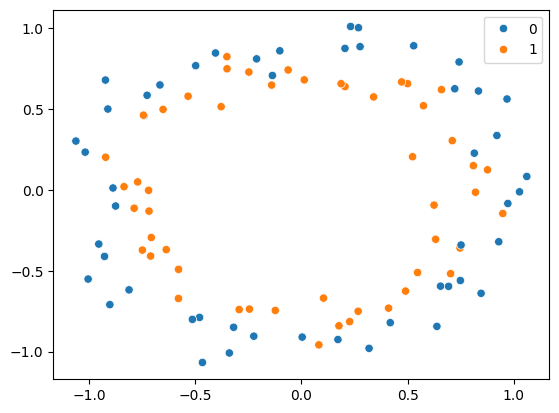

In [8]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [11]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)


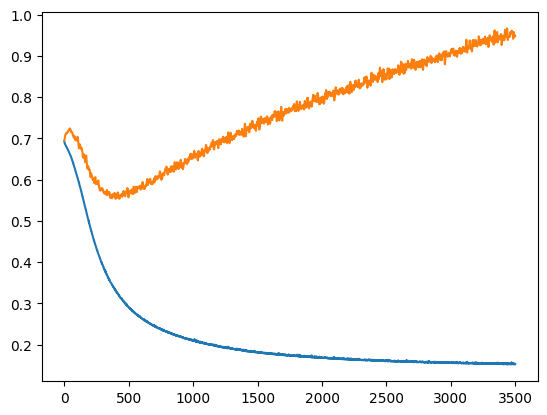

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

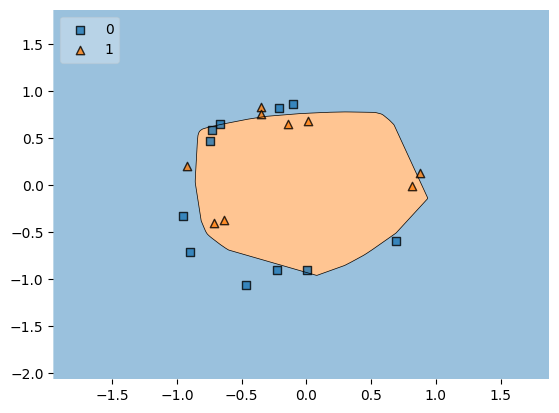

In [17]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)

## Early Stopping

In [48]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [51]:

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)


Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.5430 - loss: 0.6940 - val_accuracy: 0.4000 - val_loss: 0.7076
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5703 - loss: 0.6884 - val_accuracy: 0.4000 - val_loss: 0.7088
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5469 - loss: 0.6879 - val_accuracy: 0.4000 - val_loss: 0.7089
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5391 - loss: 0.6894 - val_accuracy: 0.4000 - val_loss: 0.7094
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5148 - loss: 0.6892 - val_accuracy: 0.4000 - val_loss: 0.7092
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5211 - loss: 0.6900 - val_accuracy: 0.4000 - val_loss: 0.7101
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5422 - loss: 0.6830 - val_accuracy: 0.4000 - val_loss: 0.7119
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5430 - loss: 0.6871 - val_accuracy: 0.4000 - 

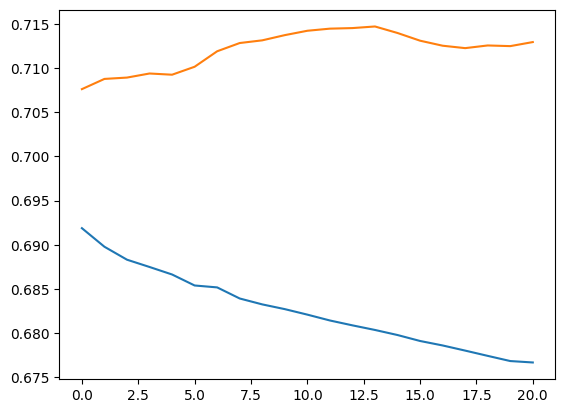

In [52]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


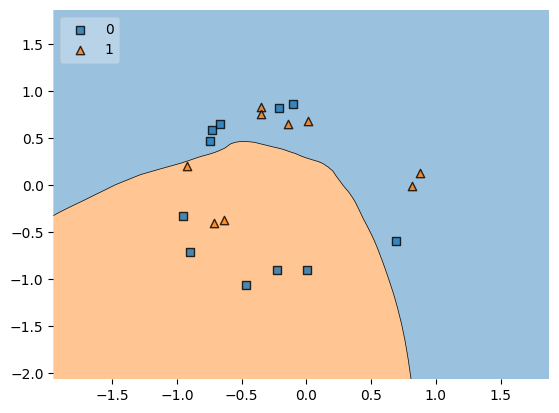

In [47]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()